## Banknote classification with fcNN without hidden layer compared to fcNN with hidden layer

**Goal:** In this notebook you will do your first classification. You will see that fully connected networks without a hidden layer can only learn linar decision boundaries, while fully connected networks with hidden layers are able to learn non-linear decision boundaries.

**Usage:** The idea of the notebook is that you try to understand the provided code. Run it, check the output, and play with it by slightly changing the code. 

**Dataset:** You work with a banknote data set and classification task. We have 5 features of wavelet transformed images of banknotes:
>1. variance  (continuous feature) 
>2. skewness (continuous feature) 
>3. curtosis (continuous feature) 
>4. entropy (continuous feature) 
>5. class (binary indicating if the banknote is real or fake)  

Don't bother too much how these features exactely came from. 


For this analysis we only use 2 features. 
> x1: skewness of wavelet transformed image  
> x2: entropy of wavelet transformed image


**The goal is to classify each banknote to either "real" (Y=0) or "fake" (Y=1).**


**Content:**
* visualize the data in a simple scatter plot and color the points by the class label
* use the Keras library to build a fcNN without hidden layers (logistic regression). Use SGD with the objective to minimize the crossentropy loss. 
* visualize the learned decision boundary in a 2D plot
* use the Keras library to build a fcNN with a single hidden layer. Use SGD with the objective to minimize the crossentropy loss. 
* visualize the learned decision boundary in a 2D plot
* compare the performace and the decision boundaries of the two models
* stack more hidden layers to the model and playaround with the epochs



| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_02/nb_ch02_01.ipynb)




#### Imports

In the next two cells, we load all the required libraries and functions from keras and numpy. We also download the data with the 5 featues from the provided url.

In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import keras 
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import to_categorical 
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Load data from url
from urllib.request import urlopen
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)

(1372, 5)


Lets extract the two featues *x1: skewness of wavelet transformed image* and *x2: entropy of wavelet transformed image*. We print the shape and see that we for X  we have 1372 oberservations with two featues and for Y there are 1372 binary labels.

In [3]:
# Here we use extract the two features and the label of the dataset
X=dataset[:,[1,3]]
Y=dataset[:,4]
print(X.shape)
print(Y.shape)

(1372, 2)
(1372,)


Since the banknotes are described by only 2 features, we can easily visualize the positions of real and fake banknotes in the 2D feature space. You can see that the boundary between the two classes is not separable by a straight line. A curved boundary line will do better. But even then we cannot expect a perfect seperation.


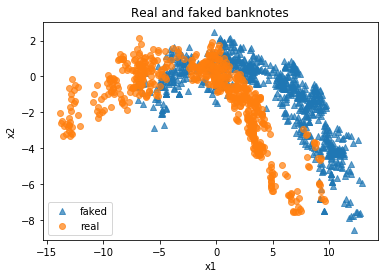

In [4]:
# visualize the data in a 2D feature space. 
idx_f = [np.where(Y==1)]
idx_r = [np.where(Y==0)]
plt.scatter(X[idx_r,0],X[idx_r,1], alpha=0.7,marker='^')
plt.scatter(X[idx_f,0],X[idx_f,1], alpha=0.7,marker='o')
plt.title("Real and faked banknotes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(("faked","real"),
           loc='lower left',
           fontsize=10)
plt.show()

### fcNN with only one neuron
Let’s try to use a single neuron with a sigmoid activation function (also known as logistic regression) as classification model to seperate the banknotes.  
We use the sequential API from keras to build the model. To fit the 3 parameters we use the stochastic gradient descent optimizer with a learning rate of 0.15.

In [5]:
# Definition of the network
model = Sequential()                                        # starts the definition of the network
model.add(Dense(1, batch_input_shape=(None, 2),             # adds a new layer to the network with a single neuron  
                activation='sigmoid'))                      # The input is a tensor of size (batch_size, 2), since we don’t specify the Batch Size now, we use None as a placeholder
                                                            # chooses the activation function ‘sigmoid’
# Definition of the optimizer
sgd = optimizers.SGD(lr=0.15)                               # Defining the stochastic gradient descent optimizer

# compile model                                             # compile model, which ends the definition of the model 
model.compile(loss='binary_crossentropy',
              optimizer=sgd,                                # using the stochastic gradient descent optimizer
              metrics=['accuracy'])

In [6]:
# summarize the architecture of the NN along with the number of weights
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In the next cell, we train the network. In other words, we tune the parameters that were initialized randomly with stochastic gradient descent to minimize our loss function (the binary corssentropy). We set the batchsize to 128 per updatestep and train for 400 epochs.

In [7]:
# Training of the network
history = model.fit(X, Y,                           # training of the model using the training data stored in X and Y for 4100 epochs
          epochs=400,                               # for 400 epochs
          batch_size=128,                           # fix the batch size to 128 examples
          verbose=0)


Lets look at the so called leraning curve, we plot the accuracy and the loss vs the epochs. You can see that after 100 epochs, we predict around 70% of our data correct and have a loss aorund 0.51 (this values can vary from run to run).

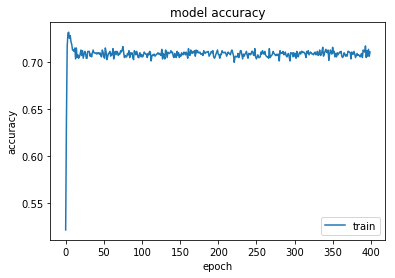

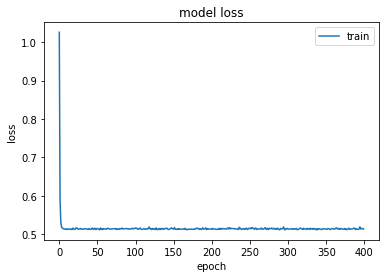

In [8]:
# plot the development of the accuracy and the loss during the training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### Plotting the learned decision boundary
Lets visualize which decision boundary was learned by the fcNN with only one output neuron (and no hidden layer).  
As you can see the decision boundary is a straight line. This is not a coincidence but a general property of a single artificial neuron with a sigmoid as activation function and no hidden layer, also known as logistic regression.


(10000, 1, 1)


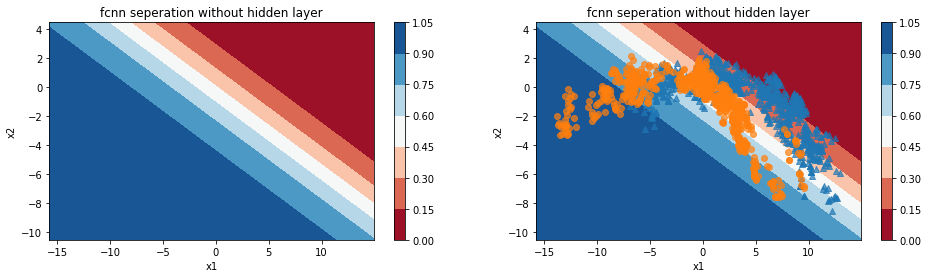

In [9]:
def plotModel(X,Y, model, t):
    # define a grid for the 2D feature space
    # predict at each grid point the probability for class 1

    x1list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100) # Define 100 points on the x-axis
    x2list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100) # Define 100 points on the x-axis
    X1_grid, X2_grid = np.meshgrid(x1list, x2list)

    # model.predict for respective value x1 and x2 
    p = np.array([model.predict(np.reshape(np.array([l1,l2]),(1,2))) for l1,l2 in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
    print(p.shape)
    if len(p.shape) == 3 and p.shape[2]==2:
        p = p[:,:,1] # pick p for class 1 if there are more than 2 classes
    p = np.reshape(p,X1_grid.shape)

    # visualize the predicted probabilities in the 2D feature space
    # once without and once with the data points used for fitting
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,(1))
    cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu')
    plt.colorbar(cp)
    plt.title(t)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.subplot(1,2,(2))
    cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu')
    plt.colorbar(cp)
    idx_f = [np.where(Y==1)]
    idx_r = [np.where(Y==0)]
    plt.scatter(X[idx_r,0],X[idx_r,1], alpha=0.7,marker='^')
    plt.scatter(X[idx_f,0],X[idx_f,1], alpha=0.7,marker='o')
    plt.title(t)
    plt.xlabel('x1')
    plt.ylabel('x2')
    
plotModel(X, Y, model, 'fcnn seperation without hidden layer') 

### fcNN with one hidden layer 

We know that the boundary between the two classes is not descriped very good by a line. Therefore a single neuron is not appropriate to model the probability for a fake banknote based on its two features. To get a more flexible model, we introduce an additional layer between input layer and output layer. This is called hidden layer. Here we use a hidden layer with 8 neurons. We also change the ouputnodes form 1 to 2, to get two ouputs for the probability of real and fake banknote. Because we now have 2 outputs, we use the *softmax* activation function in the output layer. The softmax activation ensures that the output can be interpreted as a probability (see book for details)

In [10]:
# Definition of the network
model = Sequential()
model.add(Dense(8, batch_input_shape=(None, 2),activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In this is output summary we see that we now have a lot more trainable paramters then before.  
24 = inputdim · outpuntdim + outputbias= 2 · 8 + 8   
18 = inputdim · outpuntdim + outputbias= 8 · 2 + 2   

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Transforms Y=0 to (1,0) and Y=1 to (0,1)
Y_c=to_categorical(Y,2)
Y[0:5], Y_c[0:5],Y[-5:-1],Y_c[-5:-1]

(array([0., 0., 0., 0., 0.]), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32), array([1., 1., 1., 1.]), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

In the next cell, train the network. In other words, we tune the parameters that were initialized randomly with stochastic gradient descent to minimize our loss function (the categorical crossentropy). We set the batchsize to 128 per updatestep and train for 400 epochs.

In [13]:
# Training of the network
history = model.fit(X, Y_c, 
          epochs=400, 
          batch_size=128,
          verbose=0)

Lets look again at the leraning curve, we plot the accuracy and the loss vs the epochs. You can see that after 100 epochs, we predict around 86% of our data correct and have a loss aorund 0.29 (this values can vary from run to run). This is already alot better than the model without a hidden layer.

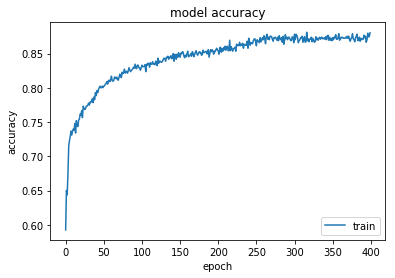

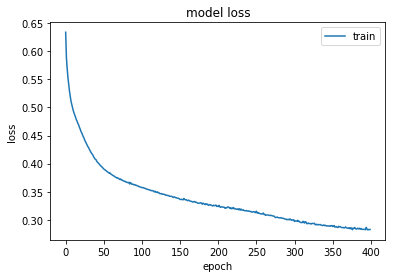

In [14]:
# plot the development of the accuracy and loss during the training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()


### Plotting the learned decision boundary
Lets visualize which decision boundary was learned by the fcNN with the hidden layer
As you can see the decision boundary is a now curved and not straight anymore. The model (with the hidden layer in the middle) separates the the two classes in the training data better and is able to learn non-linear decision boundaries. 



(10000, 1, 2)


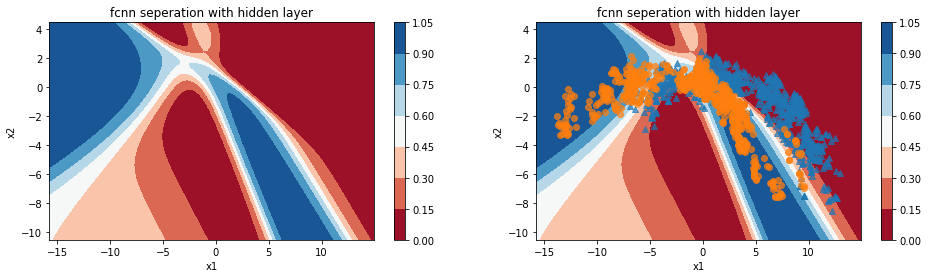

In [15]:
plotModel(X,Y,model, 'fcnn seperation with hidden layer')

#### Add more hidden layers and play around with the training epochs
<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  
*Exercise: Add more hidden layers to the model and play around with the training epochs. What do you observe? Look at the learned decision boundary. How does the loss and the accuracy change?

